# Energy nanojoule por bit

## Importanto bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

%matplotlib inline

In [2]:
# deixar a pasta scripts vizivel no notebook
%load_ext autoreload
%autoreload 2

import sys
import os

module_path = os.path.abspath(os.path.join('..', 'pyscripts'))
if module_path not in sys.path :
    sys.path.append(module_path)

In [3]:
# import module from scripts folder
import process_data

## Pre processing 

In [4]:
## import dataset from ../data
data_folder = os.path.join('..','Simulations')

simulations = ['PA','PB','CL2','CL4','CLBinomial']

# the same file will be searching
main_file = 'energy_nanojoule_bit.txt'

df_data = pd.DataFrame()

for folder in simulations:
    data_file = os.path.join(data_folder,folder,main_file)
    df = process_data.parser_main_table(data_file)
    df['Simulation'] = folder
    df_data = df_data.append(df,ignore_index=True)

del df

In [5]:
df_data.sample(10)

,info_0,info_1,node=1,node=2,node=3,node=4,node=5,Simulation
20,setRateLow,InterfModel=0,512.272,495.995,520.258,494.137,247.19,CL4
28,setRateMedium,InterfModel=0,199.914,497.392,202.171,501.382,66.193,CLBinomial
16,setRateMedium,InterfModel=0,203.941,497.939,206.981,509.443,66.447,CL2
19,setRateHigh,InterfModel=2,108.508,104.265,71.204,49.562,51.51,CL4
24,setRateHigh,InterfModel=0,104.121,103.592,68.566,46.664,48.03,CLBinomial
5,setRateMedium,InterfModel=2,198.792,496.601,199.416,500.667,65.65,PA
26,setRateLow,InterfModel=0,498.672,495.271,503.961,497.861,250.222,CLBinomial
9,setRateLow,InterfModel=2,540.533,497.215,653.331,530.268,296.516,PB
10,setRateMedium,InterfModel=0,211.84,507.401,246.81,519.346,72.104,PB
21,setRateLow,InterfModel=2,514.712,498.294,519.263,496.346,248.558,CL4


### Normalizando valores dos atributos

In [6]:
df_data.dtypes

info_0        object
info_1        object
node=1        object
node=2        object
node=3        object
node=4        object
node=5        object
Simulation    object
dtype: object

In [7]:
numeric_columns = ['node=1', 'node=2', 'node=3', 'node=4', 'node=5']
df_data[numeric_columns] = df_data[numeric_columns].astype('float')

In [8]:
modelo_colisao = {
    'InterfModel=0': 'sem colisão',
    'InterfModel=2': 'com colisão'
}

collision_model = {
    'InterfModel=0': 'without collision',
    'InterfModel=2': 'with collision'
}

def infer_collision_model(value,mapper=modelo_colisao):
    return mapper.get(value,value)

df_data['info_1'] = df_data['info_1'].apply(infer_collision_model)

In [9]:
taxa_dados = {
    'setRateLow' : 'baixa',
    'setRateMedium': 'média',
    'setRateHigh' : 'alta'
}

packet_rate = {
    'setRateLow' : 'low',
    'setRateMedium': 'medium',
    'setRateHigh' : 'high'
}

def infer_packet_rate(value,mapper=taxa_dados):
    return mapper.get(value,value)

df_data['info_0'] = df_data['info_0'].apply(infer_packet_rate)

### Renomeando colunas

In [10]:
nodes_PTbr = {
        'info_0' : 'Taxa de dados',
        'info_1' : 'Modelo de colisão',
        'node=1': 'E-Punho',
        'node=2': 'D-Punho',
        'node=3': 'E-Tornozelo',
        'node=4': 'D-Tornozelo',
        'node=5': 'Peito',
        'Simulation': 'Simulação'
    }

nodes_ENG = {
        'info_0' : 'Packet rate',
        'info_1' : 'Collision model',
        'node=1': 'L-wrist',
        'node=2': 'R-wrist',
        'node=3': 'L-ankle',
        'node=4': 'R-ankle',
        'node=5': 'chest',
    }

df_data.rename(mapper=nodes_PTbr,axis='columns', inplace=True)

In [11]:
df_data.sample(10)

,Taxa de dados,Modelo de colisão,E-Punho,D-Punho,E-Tornozelo,D-Tornozelo,Peito,Simulação
20,baixa,sem colisão,512.272,495.995,520.258,494.137,247.190,CL4
11,média,com colisão,219.918,501.556,264.989,555.803,75.865,PB
3,baixa,com colisão,495.981,495.601,496.609,496.567,247.709,PA
7,alta,com colisão,120.080,103.294,99.196,53.298,83.859,PB
5,média,com colisão,198.792,496.601,199.416,500.667,65.650,PA
10,média,sem colisão,211.840,507.401,246.810,519.346,72.104,PB
1,alta,com colisão,106.069,103.107,69.431,49.559,51.711,PA
27,baixa,com colisão,502.630,496.526,505.376,500.556,252.366,CLBinomial
4,média,sem colisão,197.944,496.830,197.831,495.784,65.292,PA
12,alta,sem colisão,104.407,103.752,68.900,46.770,48.259,CL2


In [12]:
df_data.columns

Index(['Taxa de dados', 'Modelo de colisão', 'E-Punho', 'D-Punho',
       'E-Tornozelo', 'D-Tornozelo', 'Peito', 'Simulação'],
      dtype='object')

In [13]:
df_data.dtypes

Taxa de dados         object
Modelo de colisão     object
E-Punho              float64
D-Punho              float64
E-Tornozelo          float64
D-Tornozelo          float64
Peito                float64
Simulação             object
dtype: object

In [14]:
df = df_data.describe()
df

,E-Punho,D-Punho,E-Tornozelo,D-Tornozelo,Peito
count,30.000000,30.000000,30.00000,30.000000,30.000000
mean,274.045700,366.647633,274.20560,354.131600,126.975200
std,174.550208,189.074785,198.31183,220.002869,95.591318
min,102.684000,103.073000,67.36600,46.152000,46.901000
25%,108.070000,103.880250,74.71925,50.340750,55.656750
50%,204.096500,496.303500,207.10750,496.543500,66.511500
75%,497.999250,497.632750,502.12300,506.720500,247.579250
max,540.533000,507.401000,653.33100,555.803000,296.516000


In [15]:
value_vars = list(df.columns)
id_vars = set(df_data.columns) - set(df.columns)
id_vars = list(id_vars)

### Reorganizando a tabela

In [16]:
melted_data = df_data.melt(id_vars=id_vars,
                  value_vars=value_vars,
                  value_name = 'Nanojoule',
                  var_name='Nó sensor'
                 )

In [17]:
melted_data.head()

,Modelo de colisão,Taxa de dados,Simulação,Nó sensor,Nanojoule
0,sem colisão,alta,PA,E-Punho,102.684
1,com colisão,alta,PA,E-Punho,106.069
2,sem colisão,baixa,PA,E-Punho,493.662
3,com colisão,baixa,PA,E-Punho,495.981
4,sem colisão,média,PA,E-Punho,197.944


In [18]:
melted_data.dtypes

Modelo de colisão     object
Taxa de dados         object
Simulação             object
Nó sensor             object
Nanojoule            float64
dtype: object

## Visualization

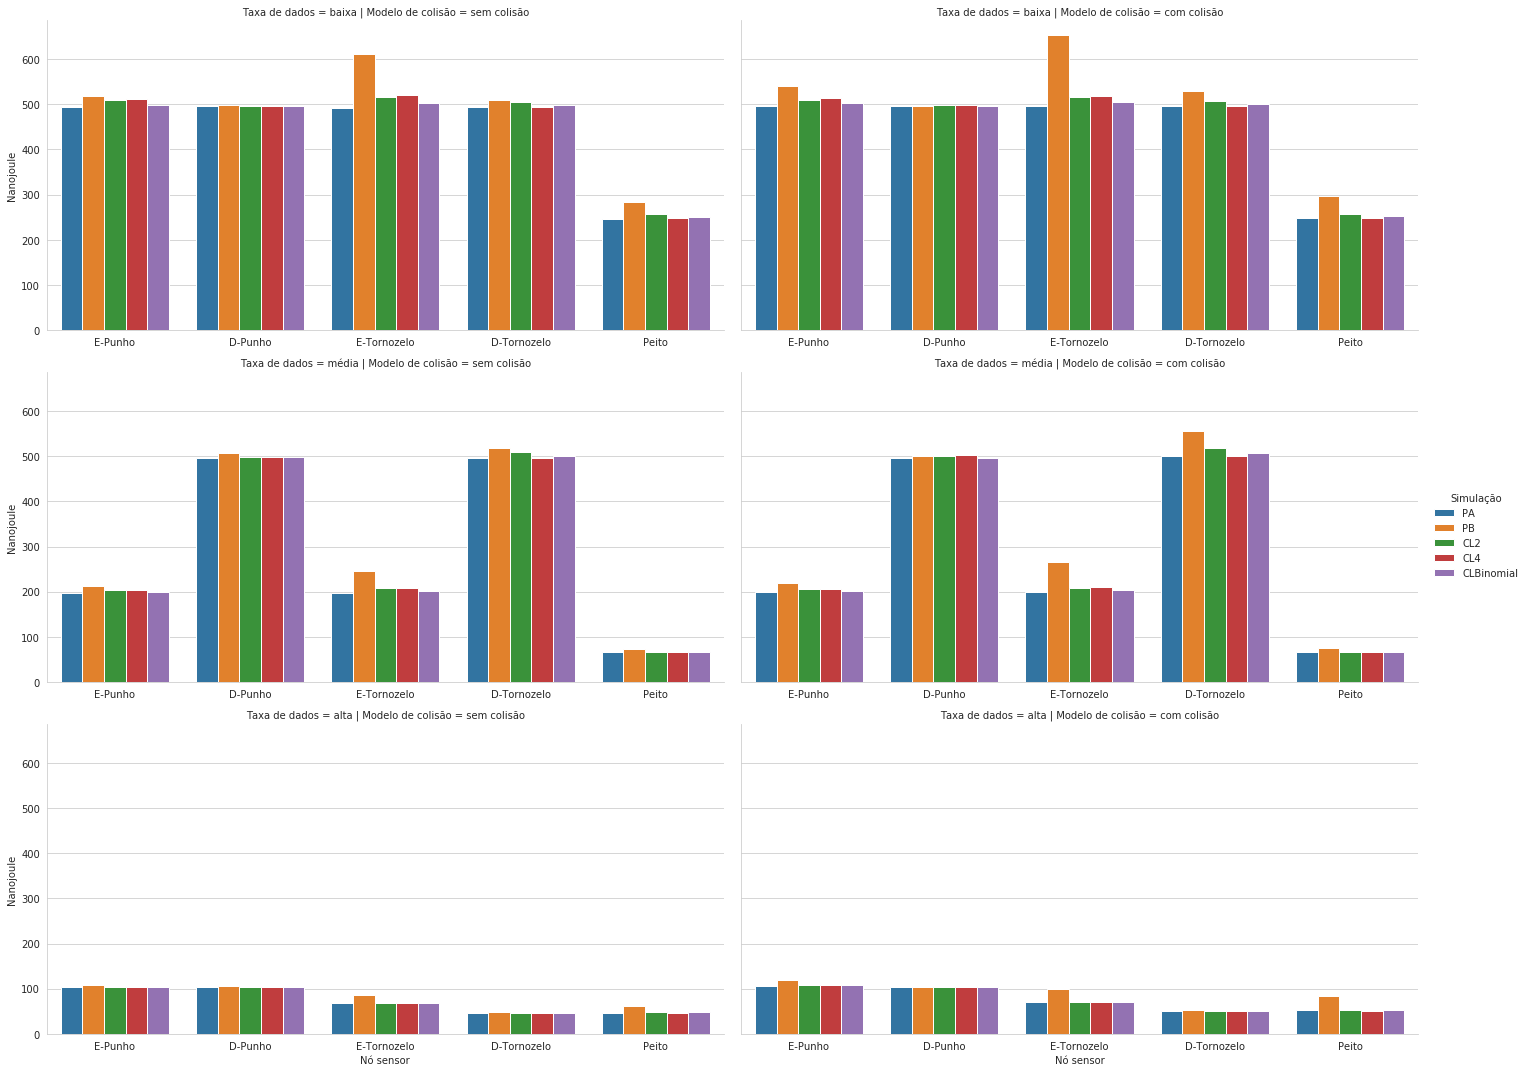

In [19]:
g = sns.catplot(data=melted_data,
                x='Nó sensor',
                y='Nanojoule',
                hue='Simulação',
                hue_order=simulations,
                col='Modelo de colisão',
                row='Taxa de dados',
                row_order=['baixa', 'média', 'alta'],
                kind='bar',
                height=5,
                aspect=2,
#                 ci=None,
                sharex=False,
               )

### Codificação dos atributos para o gráfico

Atributo       |      Tipo     |  Componente |
---------------|---------------|-------------|
Modelo-colisão |   categorico  | cor (colorido\cinza) 
Simulação      |   categorico  | cor - (colorido)
Taxa-dados     |   categorico  | ??
Nó-sensor      |   categorico  | barra - eixo x
Nanojoule      |   numérico    | altura - eixo y

In [20]:
simulacao_attr = melted_data['Simulação'].unique()
taxa_dados_attr = melted_data['Taxa de dados'].unique()
modelo_colisao_attr = melted_data['Modelo de colisão'].unique()
no_sensor_attr = melted_data['Nó sensor'].unique()

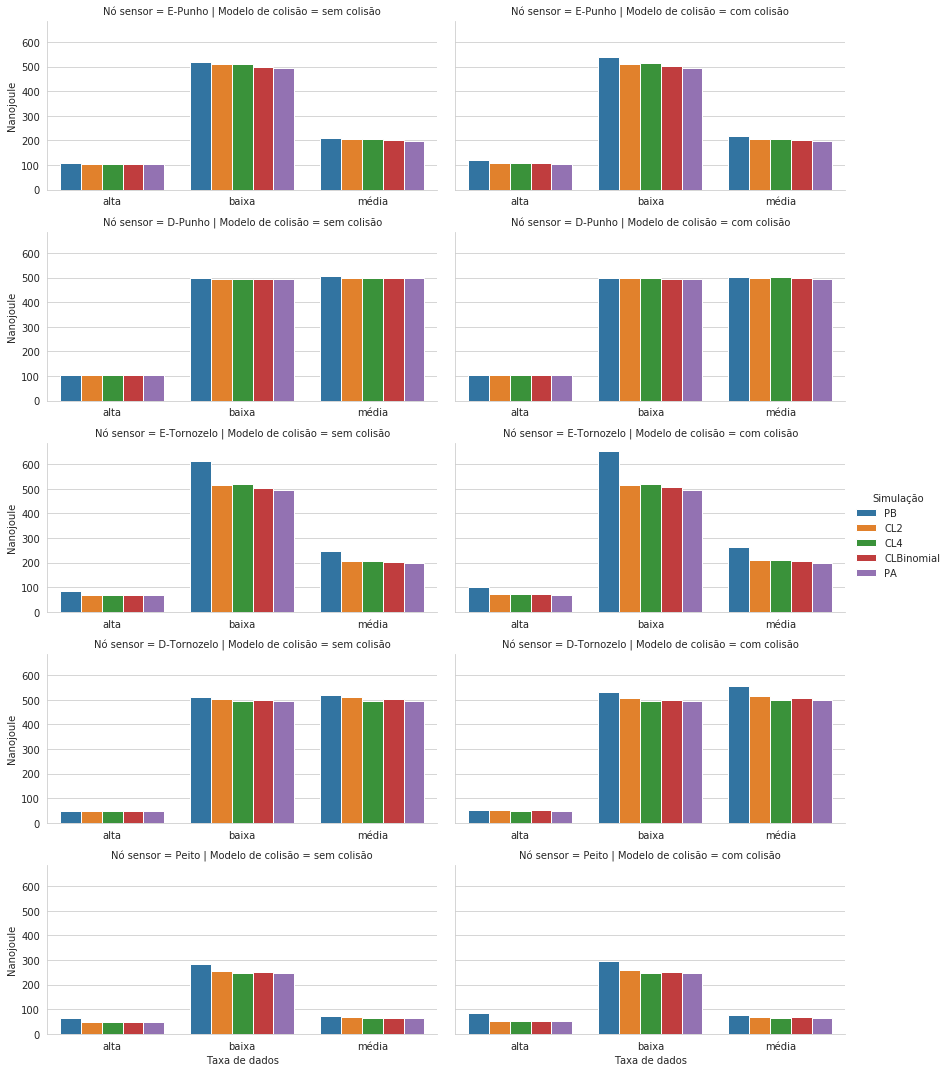

In [21]:
g = sns.catplot(data=melted_data,
                x='Taxa de dados',
                y='Nanojoule',
                hue='Simulação',
                hue_order=['PB', 'CL2', 'CL4','CLBinomial', 'PA'],
                col='Modelo de colisão',
                row='Nó sensor',
                kind='bar',
                height=3,
                aspect=2,
#                 ci=None,
                sharex=False,
               )

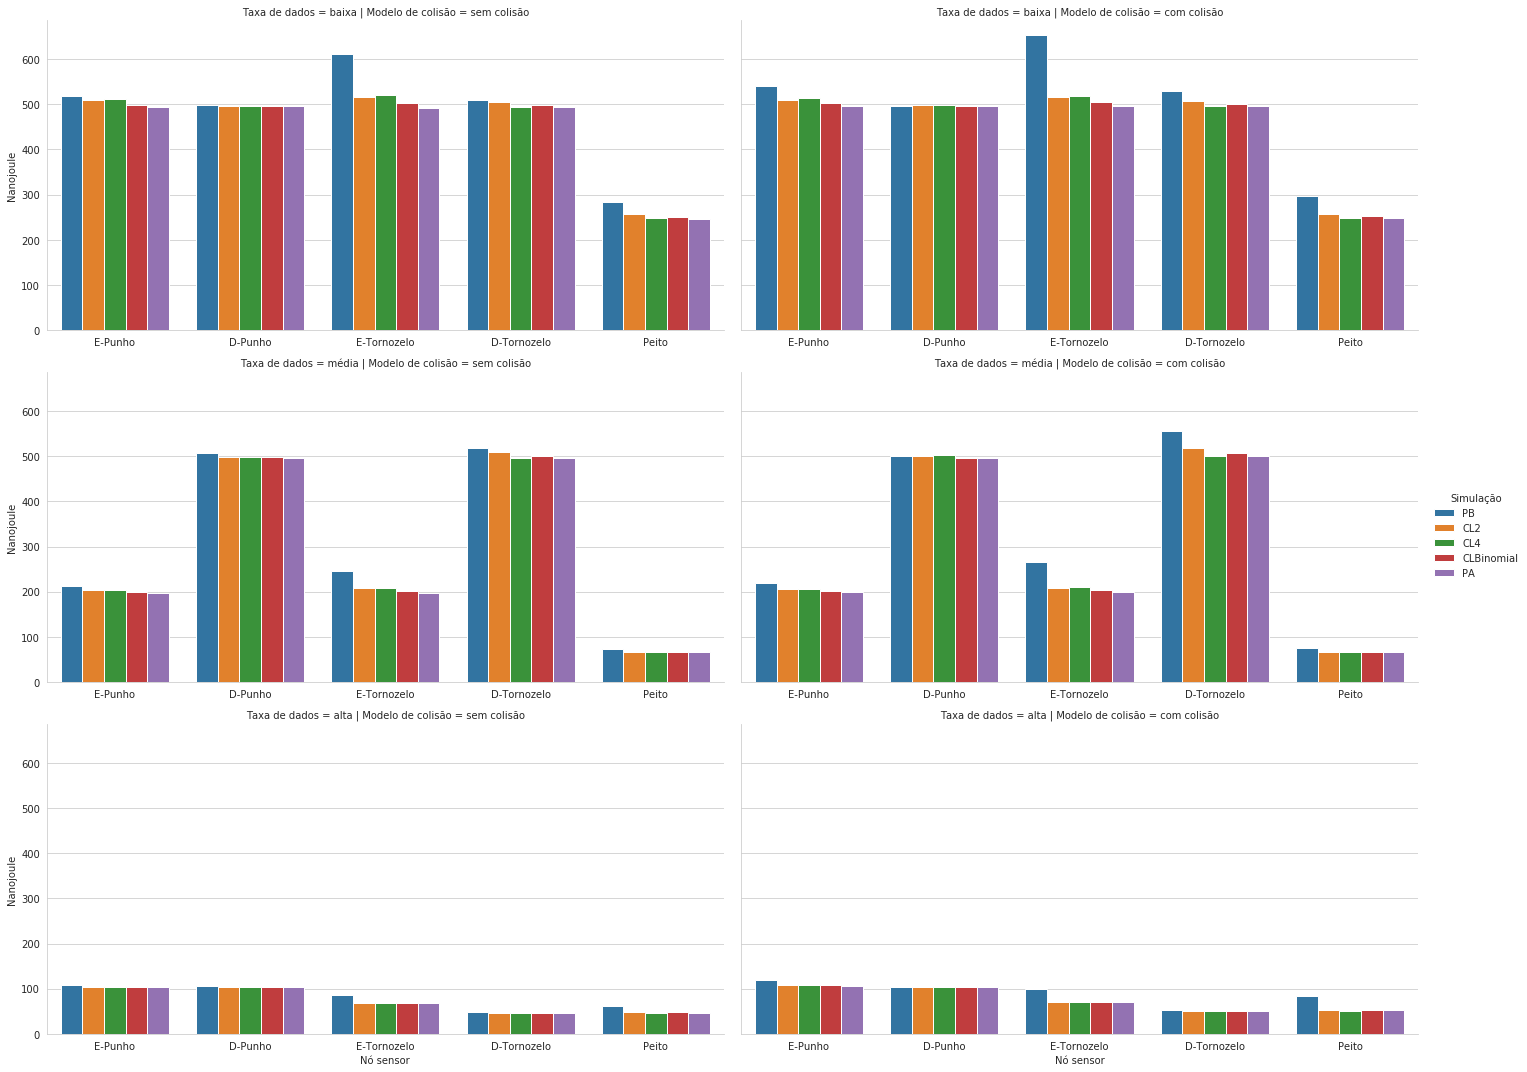

In [22]:
g = sns.catplot(data=melted_data,
                x='Nó sensor',
                y='Nanojoule',
                hue='Simulação',
                hue_order=['PB', 'CL2', 'CL4','CLBinomial', 'PA'],
                col='Modelo de colisão',
                row='Taxa de dados',
                row_order=['baixa','média','alta'],
                kind='bar',
                height=5,
                aspect=2,
#                 ci=None,
                sharex=False,
               )

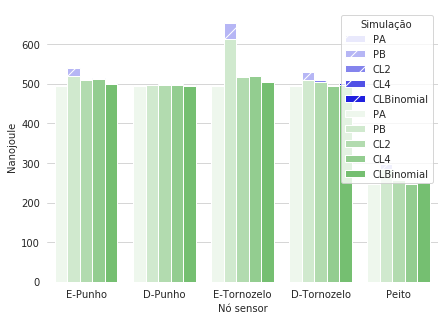

In [23]:
f, ax = plt.subplots(figsize=(7, 5))

data = melted_data[melted_data['Taxa de dados'] == 'baixa']

sns.barplot(
            y="Nanojoule",
            x="Nó sensor",
            hue="Simulação",
            data=data[data['Modelo de colisão'] == 'com colisão'],
            hatch='/',
            color='b',
            )
sns.set_color_codes("muted")

ax = sns.barplot(
            y="Nanojoule",
            x="Nó sensor",
            hue="Simulação",
            data=data[data['Modelo de colisão'] == 'sem colisão'],
            hatch='',
            color='g',
            )

sns.despine(left=True, bottom=True)

del data

In [24]:
def custom_barchart_nanojoule_bit(simulacao,taxa_dados,modelo_colisao):
    # INIT

    select_simulacao = (melted_data['Simulação'] == 'PA') | (melted_data['Simulação'] == 'PB') | (melted_data['Simulação'] == simulacao)
    select_taxa_dados = melted_data['Taxa de dados'] == taxa_dados
    select_modelo_colisao = melted_data['Modelo de colisão'] == modelo_colisao

    df = melted_data[select_simulacao & select_taxa_dados & select_modelo_colisao]

    g = sns.catplot(data=df,
                    x='Nó sensor',
                    y='Nanojoule',
                    hue='Simulação',
                    hue_order=['PA','PB', simulacao],
                    kind='bar',
                    height=5,
                    aspect=2,
                    sharex=False,
                   )
    sub_titulo = modelo_colisao.capitalize() if isinstance(modelo_colisao,str) else str(modelo_colisao)
    sub_titulo = f'Custo de Energia\n{sub_titulo}'
    g.set(title=sub_titulo)
    
    
    return g

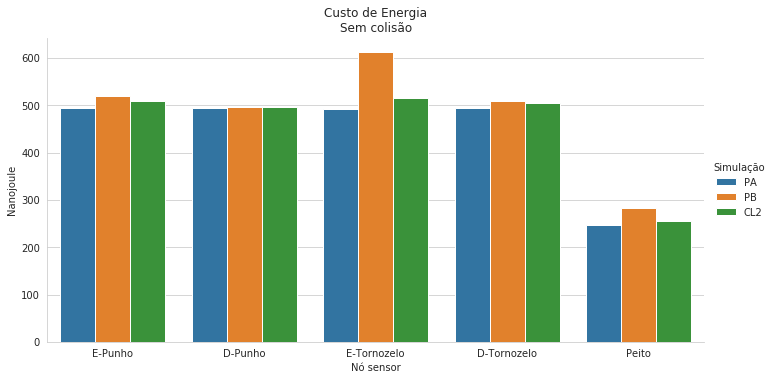

In [25]:
grid = custom_barchart_nanojoule_bit('CL2','baixa','sem colisão')

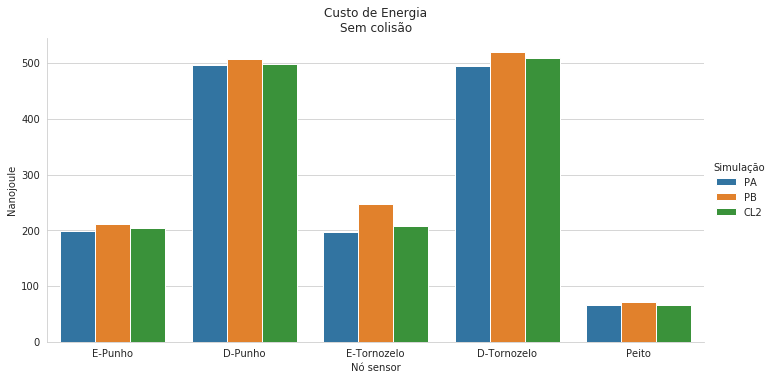

In [26]:
grid = custom_barchart_nanojoule_bit('CL2','média','sem colisão')

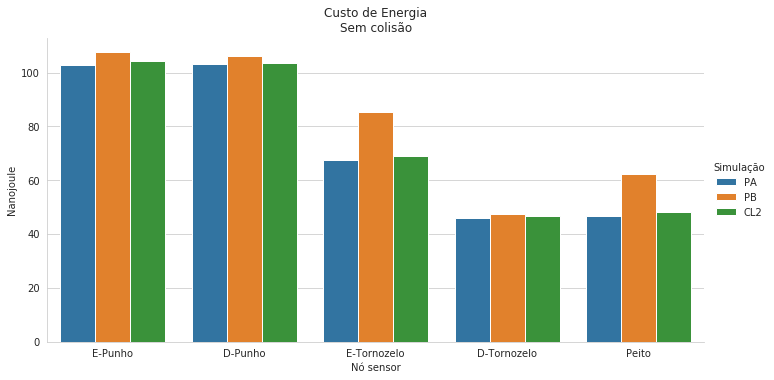

In [27]:
grid = custom_barchart_nanojoule_bit('CL2','alta','sem colisão')

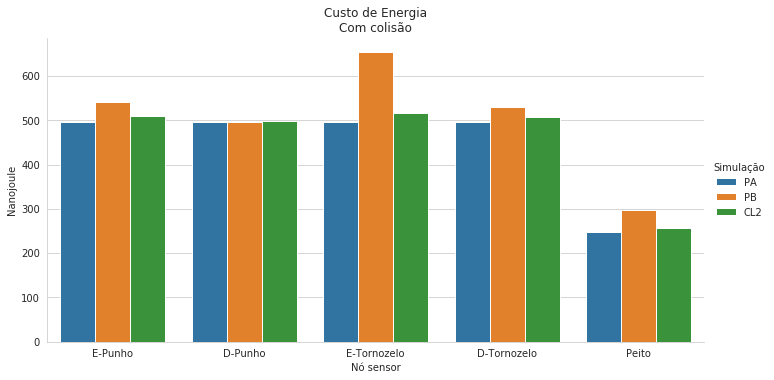

In [28]:
grid = custom_barchart_nanojoule_bit('CL2','baixa','com colisão')

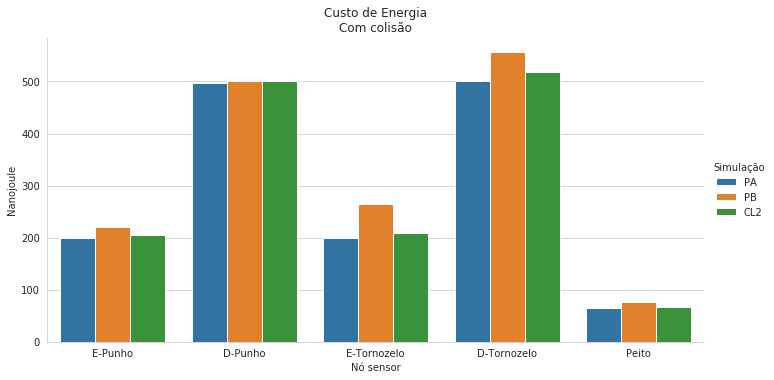

In [29]:
grid = custom_barchart_nanojoule_bit('CL2','média','com colisão')

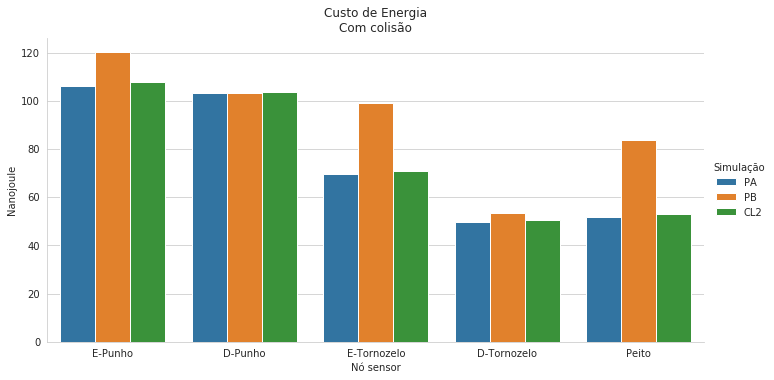

In [30]:
grid = custom_barchart_nanojoule_bit('CL2','alta','com colisão')

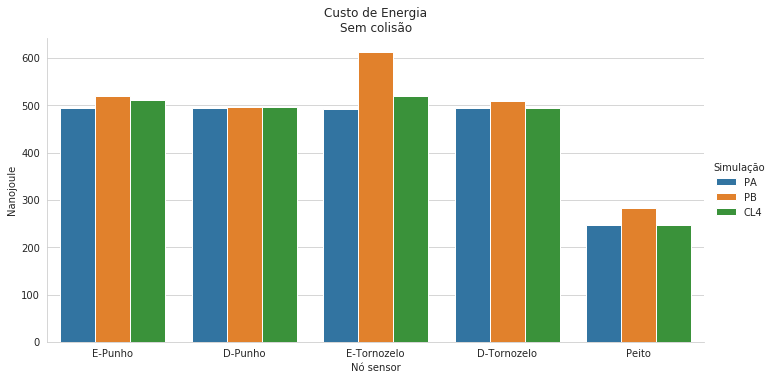

In [31]:
grid = custom_barchart_nanojoule_bit('CL4','baixa','sem colisão')

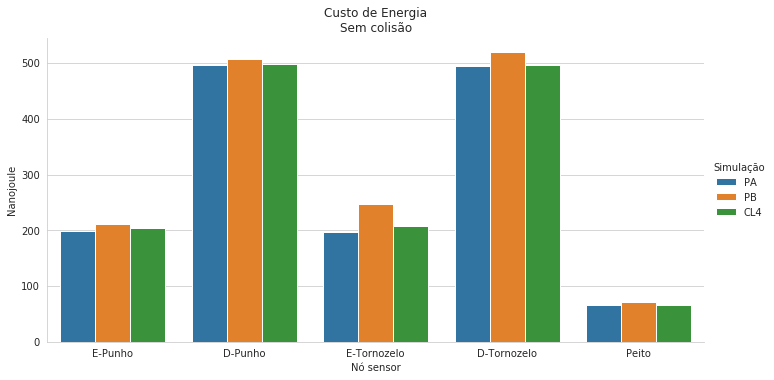

In [32]:
grid = custom_barchart_nanojoule_bit('CL4','média','sem colisão')

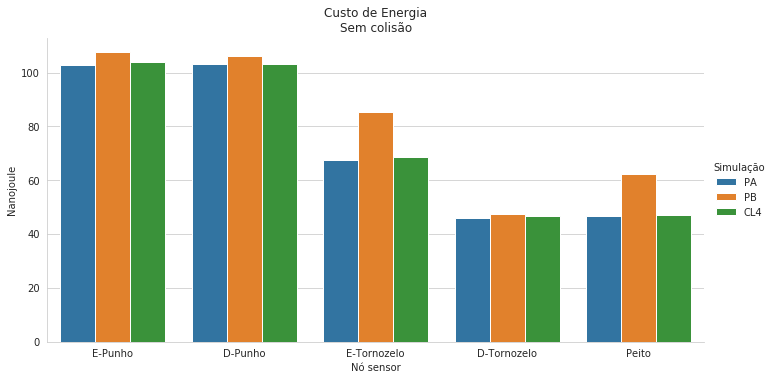

In [33]:
grid = custom_barchart_nanojoule_bit('CL4','alta','sem colisão')

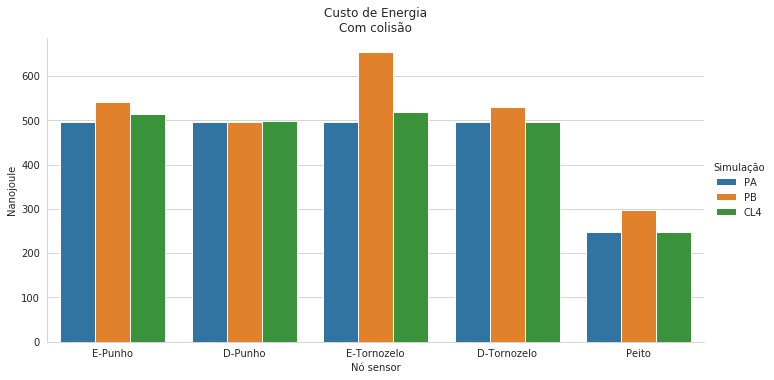

In [34]:
grid = custom_barchart_nanojoule_bit('CL4','baixa','com colisão')

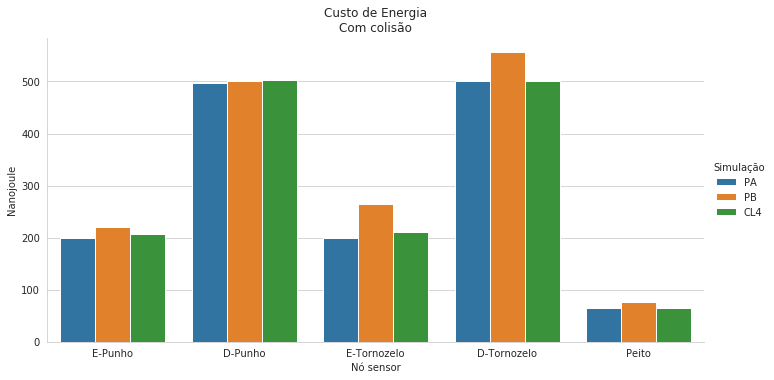

In [35]:
grid = custom_barchart_nanojoule_bit('CL4','média','com colisão')

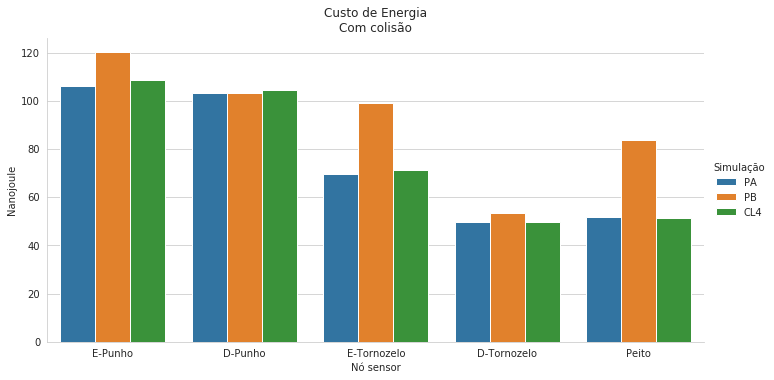

In [36]:
grid = custom_barchart_nanojoule_bit('CL4','alta','com colisão')

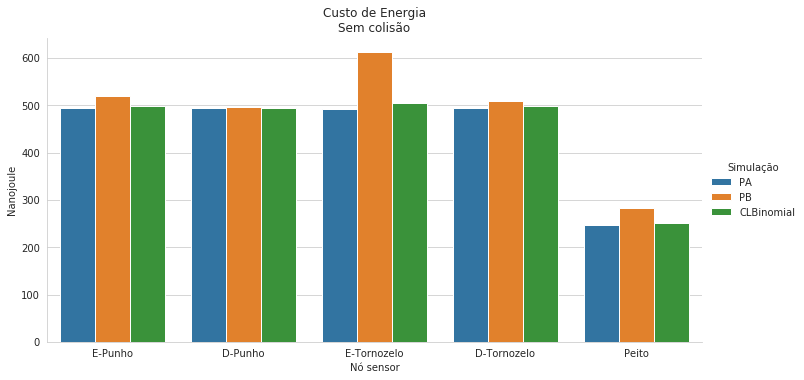

In [37]:
grid = custom_barchart_nanojoule_bit('CLBinomial','baixa','sem colisão')

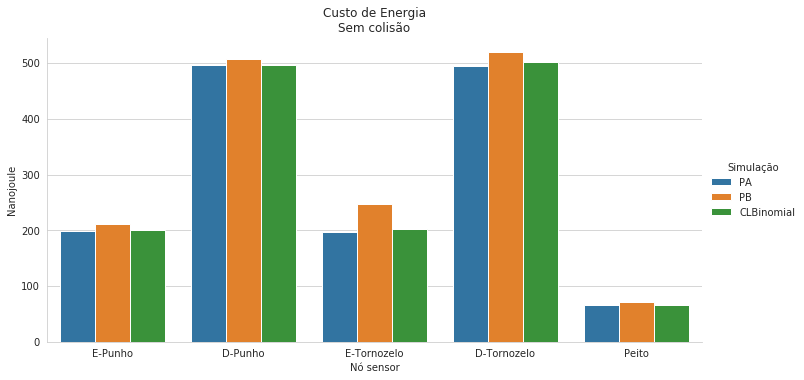

In [38]:
grid = custom_barchart_nanojoule_bit('CLBinomial','média','sem colisão')

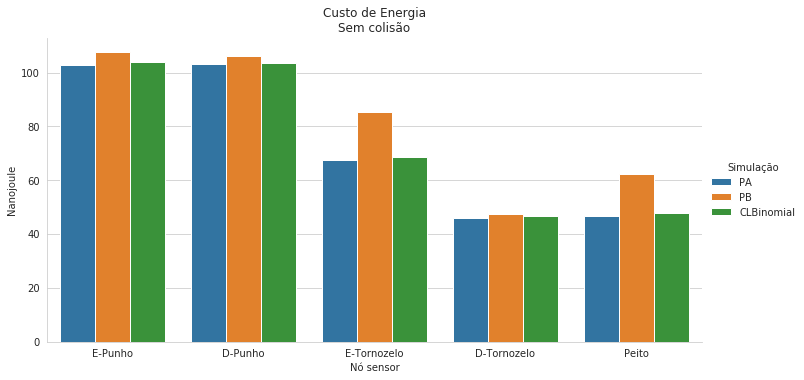

In [39]:
grid = custom_barchart_nanojoule_bit('CLBinomial','alta','sem colisão')

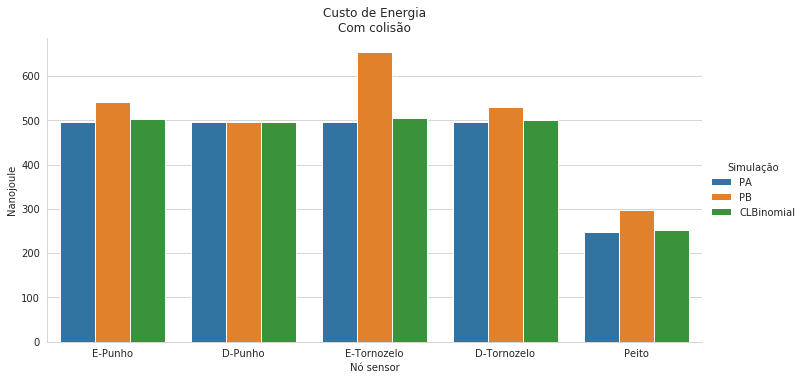

In [40]:
grid = custom_barchart_nanojoule_bit('CLBinomial','baixa','com colisão')

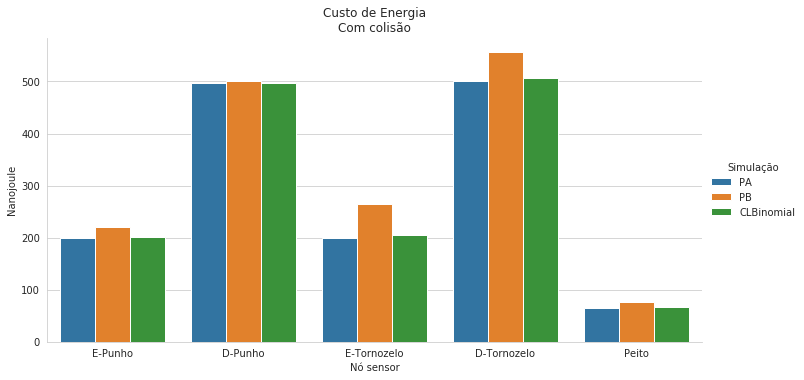

In [41]:
grid = custom_barchart_nanojoule_bit('CLBinomial','média','com colisão')

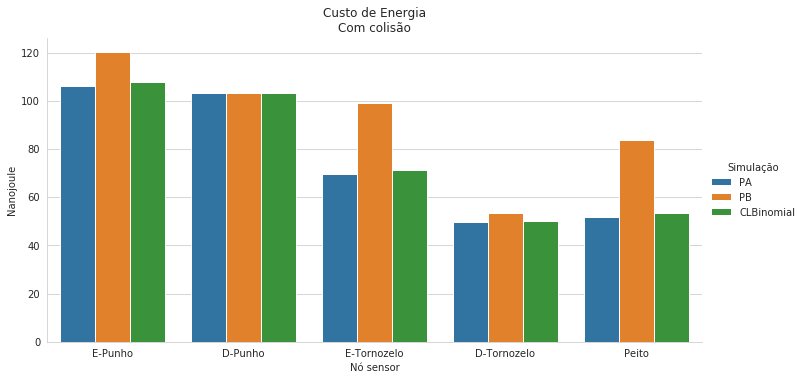

In [42]:
grid = custom_barchart_nanojoule_bit('CLBinomial','alta','com colisão')